# Introduction to pandas

*I'd like to thank Nick Ross who graciously allowed me to derive pieces of this notebook and others from his amazing SQL/pandas course notes.*

Pandas has two primary entities that you must be careful to distinguish to avoid getting confused:

* `DataFrame` is 2D tabular data structure; it has both rows and columns
* `Series` is a 1D array (colume) data structure

While a series looks like  a column from a data frame, they are really separate kinds of objects with different sets of functions that you can apply to them.  It is so important to distinguish between them that I tend to prefix the name of all data frame objects with `df_`, such as `df_salesinfo`.

Pandas lets you do a lot of querying, merging, and aggregation just like a database, but these data frames only exist in memory. That means:

* you can only operate on data that fits in memory
* data frames you construct disappear when you're Python program terminates, as opposed to the persistent disk
* pandas is not suitable for use on problems requiring multiple computers

Pandas data frames will be your primary data structure until machine learning, when we discuss building more complicated data structures such as decision trees.

## How to start using pandas

First, we have to tell Python that we want to use pandas. I also tell it to import numpy, because I often want to use both of these libraries in conjunction with each other:

In [1]:
import numpy as np
import pandas as pd

Let's load some data from the `data` subdirectory under this `notebooks` directory.  You can download this file onto your own computer wherever you want, but make sure that you specify the appropriate file name when loading it with pandas.

In [2]:
# what is my current working directory? use "pwd": "print working directory"
!pwd        # Anything after ! char is sent to Terminal for execution

/Users/parrt/github/msds593/notebooks


In [3]:
!ls -l data # list information about files in the data subdirectory

total 136
-rw-r--r--@ 1 parrt  staff   5996 Aug 15 11:49 cars.csv
-rw-r--r--+ 1 parrt  staff  21963 Aug 15 15:35 kaggle-uber-other-federal.csv
-rw-r--r--@ 1 parrt  staff  35959 Aug 15 10:32 organdonation.csv


In a spreadsheet, the start of the `cars.csv` file looks like:

<img src="images/excel.png" width="250">

In [4]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


### Exercise 1

0. Launch `jupyter lab` and create a notebook for the exercises in today's class. I like to create a notebooks directory associated with my topic or class and then launch juypter from the terminal in that directory so that I know where files are being created. See the [readme](https://github.com/parrt/msds593) for more information on the appropriate directory structure.
1. Download the `cars.csv` file and save it either in the same directory as your notebook or in a `data` subdirectory.  You have to get use to being very organized and paying attention to the structure of your directories when referring to files on the disk.
2. Import pandas and read in the `cars.csv` file into a data frame called `df_cars`, just to be consistent with your fellow students and the instructor.
3. Print the first few rows of that data frame.

## Element data types

You can learn more about all of the [pandas data types](https://numpy.org/doc/stable/user/basics.types.html), but the key idea is that we must distinguish between integers, floating-point values (reals), boolean, strings, and datetime.

|Description| Python | Pandas|
| ----------- | --------- | ---- |
|Integers| `int`|`int64`|
|Text| `str`| `object`|
|Double/Float| `float`|`float64` |
|Boolean (T/F)| `bool`| `bool`|
|Date/Time| `datetime` | `datetime64`|
|Categorical| n/a | `category` (held internally as an integer)|

The reason that we emphasize knowing types is that these objects behave differently and respond to a different set of functions.

In [5]:
type([1,2,3]), type(np.array([1,2,3]))

(list, numpy.ndarray)

In [6]:
type(df_cars), type(df_cars['MPG'])  # `[..]` indexing a data frame returns a column (as a series object)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [7]:
type(3.14159), df_cars['MPG'].dtype # what is data type of a float and the MPG column?

(float, dtype('float64'))

### Reading in nonnumeric data

Let's look at some public domain data from [Kaggle's Uber Pickups in New York City competition](https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city). (The license says public domain so it should be okay to host the 100 rows in this repository for educational purposes.)  The goal is to look at date-related, string and  [categorical data types](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html).

In [8]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv")
df_uber.head(3)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned


In [9]:
df_uber.info() # everything looks like a string (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             99 non-null     object
 1   Time             99 non-null     object
 2   PU_Address       99 non-null     object
 3   DO_Address       98 non-null     object
 4   Routing Details  99 non-null     object
 5   PU_Address.1     99 non-null     object
 6   Status           99 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


Ooops.  It read everything in as a string (`object`). Let's try this again being more specific:

In [10]:
df_uber = pd.read_csv("data/kaggle-uber-other-federal.csv",
                      parse_dates=['Date','Time'],
                      dtype={'Status':'category'})
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             99 non-null     datetime64[ns]
 1   Time             99 non-null     datetime64[ns]
 2   PU_Address       99 non-null     object        
 3   DO_Address       98 non-null     object        
 4   Routing Details  99 non-null     object        
 5   PU_Address.1     99 non-null     object        
 6   Status           99 non-null     category      
dtypes: category(1), datetime64[ns](2), object(4)
memory usage: 5.0+ KB


In [11]:
df_uber.head(2)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,2020-08-17 07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,2020-08-17 07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived


## Getting an initial sniff of the data

The first step in EDA (of course, after you've decided what problem you're trying to solve) is to get a basic idea of what the data looks like. We've already seen how to get all of the data types:

In [12]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     392 non-null    float64
 1   CYL     392 non-null    int64  
 2   ENG     392 non-null    float64
 3   WGT     392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.4 KB


We also want to know the names of the columns which is provided by `info()` but we can ask for it explicitly, which is useful because we sometimes want to operate on the column names:

In [13]:
df_cars.columns, type(df_cars.columns) # gets a pandas `Index` object

(Index(['MPG', 'CYL', 'ENG', 'WGT'], dtype='object'),
 pandas.core.indexes.base.Index)

In [14]:
df_cars.columns.values, type(df_cars.columns.values) # gets a numpy version

(array(['MPG', 'CYL', 'ENG', 'WGT'], dtype=object), numpy.ndarray)

In [15]:
list(df_cars.columns) # get a simple Python list of column names

['MPG', 'CYL', 'ENG', 'WGT']

Next, we want to know how many rows there are:

In [16]:
len(df_cars)

392

The next thing to do is probably to get some summary statistics about the data, at least for numeric columns, which is what we have in the cars data set:

In [17]:
df_cars.describe()

,MPG,CYL,ENG,WGT
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184
std,7.805007,1.705783,104.644004,849.402560
min,9.000000,3.000000,68.000000,1613.000000
25%,17.000000,4.000000,105.000000,2225.250000
50%,22.750000,4.000000,151.000000,2803.500000
75%,29.000000,8.000000,275.750000,3614.750000
max,46.599998,8.000000,455.000000,5140.000000


### Visualizing the raw data

Summary statistics are great but they can often hide a great deal of variability, so I like to visualize the data to get the broad "shape" of the data. Let's start with the standard preamble I put in all of my notebooks doing visualization:

In [18]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!

One of the frustrating parts of matplotlib is that there are often many ways to do the same thing. At the highest level, there are two interfaces, one of them old-school and one of them new-school. Here is old-school non-object-oriented style where we do everything through the `plt` package.  The goal is to get a histogram of the weight of cars:

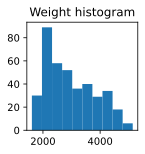

In [19]:
plt.figure(figsize=(2,2))     
plt.hist(df_cars['WGT'])             # everything is prefixed with "plt."
plt.title("Weight histogram")
plt.show() # this is unnecessary

The new object-oriented style is much more flexible, and instead of prefixing with the package `plt.`, most of our function calls are prefixed with the "[axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)" we want to plot on. 

**CONFUSION POINT**: In perhaps the world's worst word choice ever, the author of the library decided that the term *axes* refers to a subsection of the overall figure; i.e., the place where we do the plotting.  It should not be confused with the mathematical term *axis* that we all know and love. Anyway, here is how I get a new plot to draw on. It gives me the overall figure object and the *axes* (yuck) object I need for plotting.

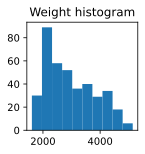

In [20]:
fig, ax = plt.subplots(figsize=(2,2))  # make one subplot (ax) on the figure

ax.hist(df_cars['WGT'])
ax.set_title("Weight histogram")

plt.show() # not needed actually as plot shows up by default in notebook

I recommend you choose either old or new school API and stick with it.  I will be using exclusively the more general object-oriented API.

### Exercise 2

1. Read in the cars.csv file into a data frame variable; again I recommend that you prefix the variable name with `df_`.
1. Display the column names
1. Display the number of rows
1. Plot a histogram of the engine horsepower, column `ENG`; set an appropriate title of the plot.
1. Plot a scatter plot of WGT on the X axis and MPG on the Y axis using `scatter()`.

## Series objects

Let's look in more detail at the `Series` objects that I think of as representing columns, but are actually useful on their own. For example, I might simply have some timeseries data I want to store. A series object is a one-dimensional sequence of values, all with the same data type. For example, I could have a series of integers, strings, or floating-point numbers.

Each series object has an associated index that sort of names the elements of the series.  The index values are commonly integers or strings. If we don't specifically specify an index, the index is just a series of consecutive integers starting from zero. That behaves then just like a list in Python when we use the `[...]` index operator.

In [21]:
a = pd.Series([10,2.4,81,1005]) # make a series with four numbers of type float
a

0      10.0
1       2.4
2      81.0
3    1005.0
dtype: float64

In [22]:
len(a), a.dtype

(4, dtype('float64'))

In [23]:
a.index

RangeIndex(start=0, stop=4, step=1)

In [24]:
b = pd.Series([10,2.4,81,1005], index=['t','u','v','w'])
b

t      10.0
u       2.4
v      81.0
w    1005.0
dtype: float64

In [25]:
b.index

Index(['t', 'u', 'v', 'w'], dtype='object')

We all understand the idea of a list of numbers in Python and we access the elements using the same syntax. The only difference is that the values inside the `[...]` can only be integers in Python. In pandas, the index value to use must be the same as the index of the series.

In [26]:
a[2], a[3]

(81.0, 1005.0)

In [27]:
b['u'], b['w']

(2.4, 1005.0)

We use the same notation to set values:

In [28]:
a[2] = 9999
a

0      10.0
1       2.4
2    9999.0
3    1005.0
dtype: float64

In [29]:
b['u'] = 9999
b

t      10.0
u    9999.0
v      81.0
w    1005.0
dtype: float64

We can even use multiple values when indexing:

In [30]:
b[['u','w']]

u    9999.0
w    1005.0
dtype: float64

In [31]:
list(b[['u','w']])  # get a simple Python list of values

[9999.0, 1005.0]

To give you a taste of the power of pandas,  we can even use relational operators to select elements from a series:

In [32]:
a[a<100]

0    10.0
1     2.4
dtype: float64

In [33]:
b[b>100]

u    9999.0
w    1005.0
dtype: float64

You can think of a series as a dictionary where the index values map to values in the series.

Series index values do not have to be unique:

In [34]:
x = pd.Series([1,2,3], index=['a','a','b'])
x

a    1
a    2
b    3
dtype: int64

In [35]:
x['a']

a    1
a    2
dtype: int64

To avoid using the index and use simply the integer position of the series value, use `iloc`:

In [36]:
print( a.iloc[0], a.iloc[1], a.iloc[2] )

10.0 2.4 9999.0


There are lots of functions you can perform on series. For example:

In [37]:
a.min(), a.max(), a.mean(), a.sum()

(2.4, 9999.0, 2754.1, 11016.4)

## Arithmetic with series

As with numpy, we can add series together and perform lots of other operations. Let's make some simple series of numbers and add them together:

In [38]:
a = pd.Series(range(5,10))
b = pd.Series(range(30,35))
print(a)
print(b)
a+b

0    5
1    6
2    7
3    8
4    9
dtype: int64
0    30
1    31
2    32
3    33
4    34
dtype: int64


0    35
1    37
2    39
3    41
4    43
dtype: int64

In [39]:
a.values + b.values  # using ".values" extract the underlying numpy array

array([35, 37, 39, 41, 43])

The index of the series elements  makes this a little more complicated but much more sophisticated. For example, imagine that we have values associated with multiple states in the US:

In [40]:
income = pd.Series([100,110,200,45], index=['WA','NV','CA','IA'])
taxes  = pd.Series([20,25,np.nan,5], index=['WA','NV','CA','IA'])
print(income)
print(taxes)

WA    100
NV    110
CA    200
IA     45
dtype: int64
WA    20.0
NV    25.0
CA     NaN
IA     5.0
dtype: float64


In [41]:
income - taxes

WA    80.0
NV    85.0
CA     NaN
IA    40.0
dtype: float64

The key thing to notice here is that we don't have tax information for CA. When we add the two series together, pandas lines them up according to the index values so that things match up: WA to WA etc.

Keep in mind: Any arithmetic involving a nan, results in a nan.

We can also scale series very easily using arithmetic operators:

In [42]:
income*2

WA    200
NV    220
CA    400
IA     90
dtype: int64

###  Exercise 3

1. Make a `Series` object with year values: `1991,1992,1993,1994,1995,1996,1997,1998,1999,2000`.
1. Print out how many total values there are using code not counting
1. Print all values less than 1997
1. Make another series with rainfall values `12.09,12.35,12.51,10.25,10.18,10.59,10.26,10.48,8.67,10.23,9.53,10.48`
1. Print out the years for which rainfall was less than 11.
1. Scale and print out a rainfall series that is 20% higher

## Something's missing

Real-world data sets often have missing values. For example, if we are capturing ocean temperature with a series of devices bobbing in the ocean, some of them will be swallowed be destroyed and we won't get any more data from them. Or,  if we are conducting a survey, some respondents will leave some entries blank. 

We need a way to represent missing data. A common way to do this is to choose a sentinel value like -1 or a string like 'n/a' or 'missing'. I even saw data set where 1000 was used as the missing value indicator for year values. Pandas formalizes missing values by representing them as "not a number", a special floating-point value, `np.nan`, from numpy that indicates the value is invalid and should not be treated as such.

In [43]:
c = pd.Series([10,20,np.nan,40], index=['t','u','v','w'])
c

t    10.0
u    20.0
v     NaN
w    40.0
dtype: float64

When doing EDA, it's very common to ask if there are missing values, which we can do with `isnull()`:

In [44]:
c.isnull() # return a Boolean indicating whether the series value is nan or correct

t    False
u    False
v     True
w    False
dtype: bool

**A subtle but important point here**: `np.nan` has type `float` and, since all values in a series must be the same type, a series of integer values with at least one missing value causes the entire series to be floating-point. Non-numeric series stay as `object`.

In [45]:
d = pd.Series(['hi','mom',np.nan])
d

0     hi
1    mom
2    NaN
dtype: object

In [46]:
d.isnull()

0    False
1    False
2     True
dtype: bool

To get all of the non-missing data, we can use that function as an index value!

In [47]:
c[~c.isnull()]  # ~c.isnull() means "not null" or "not np.nan"

t    10.0
u    20.0
w    40.0
dtype: float64

In [48]:
d[~d.isnull()]

0     hi
1    mom
dtype: object

###  Exercise 4

1. Make a `Series` object with values: `1991,1992,1993,1994,1995,np.nan,1997,1998,1999,2000`.
1. Print out the non-NAN values
1. Set the NaN value to be 1996 and print the series out again

## Data frames

A `DataFrame` object is a two-dimensional matrix with rows and columns just like a spreadsheet or database table.  Each column can have different data types, but all values within a column must be of the same data type; the columns behave like series objects.

Data frames columns are ordered and the name-to-column mapping is stored in an index.  Data frames also have an index of the rows, just like a series has an index into the values of the series. So, a data frame has two indexes which lets us zero in, for example, on a specific element using row and column index values.

We've already seen how to load dataframes, such as cars and some Uber data.

In [49]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


To extract a column, we get a series object:

In [50]:
type(df_cars['MPG'])

pandas.core.series.Series

In [51]:
mpg = df_cars['MPG']
mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: MPG, Length: 392, dtype: float64

Once we have a series object, we can use the series index to get elements:

In [52]:
mpg.iloc[3], mpg[3]   # the default index is just the integer position like iloc

(16.0, 16.0)

So, when you index into a data frame, you get a column. When you index into a series, you get an element.

Let's look at the Uber data again and extract three columns. Please note the use of a list as an index value and the fact that we get a data frame back not a series:

In [53]:
df_status = df_uber[['Date','Time','Status']]
print(type(df_status))
df_status.head(3)

<class 'pandas.core.frame.DataFrame'>


,Date,Time,Status
0,2014-07-01,2020-08-17 07:15:00,Cancelled
1,2014-07-01,2020-08-17 07:30:00,Arrived
2,2014-07-01,2020-08-17 08:00:00,Assigned


The columns form an index but there is also an index for the rows. The default index for the rows is just the integer position.

In [54]:
df_status.index

RangeIndex(start=0, stop=99, step=1)

To get a data frame row at a specific integer position, use `iloc`:

In [55]:
df_status.iloc[1]

Date      2014-07-01 00:00:00
Time      2020-08-17 07:30:00
Status                Arrived
Name: 1, dtype: object

In [56]:
df_status.iloc[2:4]

,Date,Time,Status
2,2014-07-01,2020-08-17 08:00:00,Assigned
3,2014-07-01,2020-08-17 09:00:00,Assigned


To access a row using the index, instead of by position, use `loc`:

In [57]:
df_status.loc[1]

Date      2014-07-01 00:00:00
Time      2020-08-17 07:30:00
Status                Arrived
Name: 1, dtype: object

We can actually specify both a row and column using the `loc` operator:

In [58]:
df_status.loc[1,'Time'], df_status.loc[1,'Status']

(Timestamp('2020-08-17 07:30:00'), 'Arrived')

Another very useful operation is to set the index to one of the columns of the data frame:

In [59]:
df_status = df_status.set_index('Date')   # note that I reassign it to itself
df_status.head(5)

,Time,Status
Date,,
2014-07-01,2020-08-17 07:15:00,Cancelled
2014-07-01,2020-08-17 07:30:00,Arrived
2014-07-01,2020-08-17 08:00:00,Assigned
2014-07-01,2020-08-17 09:00:00,Assigned
2014-07-01,2020-08-17 09:30:00,Assigned


Then we can conveniently ask for all rows with a specific date using the index:

In [60]:
df_status.loc['07/03/2014'].head(3)

,Time,Status
Date,,
2014-07-03,2020-08-17 05:00:00,Arrived
2014-07-03,2020-08-17 05:45:00,Assigned
2014-07-03,2020-08-17 06:55:00,Arrived


We can reset the index as well to make the index become a column again:

In [61]:
df_status = df_status.reset_index()
df_status.head(3)

,Date,Time,Status
0,2014-07-01,2020-08-17 07:15:00,Cancelled
1,2014-07-01,2020-08-17 07:30:00,Arrived
2,2014-07-01,2020-08-17 08:00:00,Assigned


### Missing values in a data frame

Returning to our friend the missing value, we can ask for a matrix of Boolean values indicating whether a specific row and column value is missing:

In [62]:
df_status.isnull().head(5)   # notice I am chaining the functions here isnull->head

,Date,Time,Status
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [63]:
df_status.isnull().sum()  # how many in each column are missing? it turns out none are missing:

Date      0
Time      0
Status    0
dtype: int64

In [79]:
df_status.isnull().any()

Time      False
Status    False
dtype: bool

### Altering data frames

We often want to alter the values in a data frame, such as when we clean up data in preparation for modeling. We can set individual values, rows, or entire columns.

In [64]:
df_status['junk'] = 0      # insert a new column
df_status.head(3)

,Date,Time,Status,junk
0,2014-07-01,2020-08-17 07:15:00,Cancelled,0
1,2014-07-01,2020-08-17 07:30:00,Arrived,0
2,2014-07-01,2020-08-17 08:00:00,Assigned,0


In [65]:
df_status['junk'] = 99     # overwrite a column with a single value
df_status.head(3)

,Date,Time,Status,junk
0,2014-07-01,2020-08-17 07:15:00,Cancelled,99
1,2014-07-01,2020-08-17 07:30:00,Arrived,99
2,2014-07-01,2020-08-17 08:00:00,Assigned,99


In [66]:
df_status['junk'] = range(100,199)  # set a column to a new series of data
df_status.head(3)

,Date,Time,Status,junk
0,2014-07-01,2020-08-17 07:15:00,Cancelled,100
1,2014-07-01,2020-08-17 07:30:00,Arrived,101
2,2014-07-01,2020-08-17 08:00:00,Assigned,102


In [67]:
df_status = df_status.drop('junk', axis=1)    # axis=1 means drop a column
df_status.head(3)

,Date,Time,Status
0,2014-07-01,2020-08-17 07:15:00,Cancelled
1,2014-07-01,2020-08-17 07:30:00,Arrived
2,2014-07-01,2020-08-17 08:00:00,Assigned


Or you can use `del df_status['junk']` which might be a bit more obvious.

In [68]:
df_status.loc[0,'Status'] = 'Arrived'     # Update a single categorical value in one column
df_status.head(3)

,Date,Time,Status
0,2014-07-01,2020-08-17 07:15:00,Arrived
1,2014-07-01,2020-08-17 07:30:00,Arrived
2,2014-07-01,2020-08-17 08:00:00,Assigned


**WARNING**: Injecting a new column into, say, `df_status` is no problem as long as the data frame referred to is the entire data frame, and not a subset (sometimes called a view).  For example, the following gets an error because I'm updating a "slice" of the original data frame.

In [69]:
df_x = df_status.iloc[5:10]
df_x['junk'] = 0

<ipython-input-69-9d68419b659c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['junk'] = 0


My usual solution is simply to make a copy so I get a copy and not a subset view of the original data frame:

In [70]:
df_x = df_status.iloc[5:10].copy()
df_x['junk'] = 0
df_x

,Date,Time,Status,junk
5,2014-07-01,2020-08-17 12:00:00,Arrived,0
6,2014-07-01,2020-08-17 12:30:00,Assigned,0
7,2014-07-01,2020-08-17 13:00:00,Assigned,0
8,2014-07-01,2020-08-17 14:30:00,Arrived,0
9,2014-07-01,2020-08-17 14:45:00,Assigned,0


In [71]:
df_status.head(2)   # original is unchanged

,Date,Time,Status
0,2014-07-01,2020-08-17 07:15:00,Arrived
1,2014-07-01,2020-08-17 07:30:00,Arrived


Most of the time we are not deleting rows but we can do so using use `drop`.  Most likely we are asking for a subset of the data.  For example, here is how to find all trips that arrived:

In [81]:
df_status[df_status['Status']=='Arrived'].head(3)

,Time,Status
Date,,
2014-07-01,2020-08-17 07:15:00,Arrived
2014-07-01,2020-08-17 07:30:00,Arrived
2014-07-01,2020-08-17 12:00:00,Arrived


### Exercise 5

1. Read the cars data set into a data frame; print out how many records there are
2. Compute the average horsepower per cylinder by dividing column ENG by CYL
3. Use numpy's function `np.corrcoef(x,y)` to compute the correlation between a car's weight and the miles per gallon; that function returns a matrix of x with x, x with y, etc... so the diagonal will always be correlation 1.0.  You should see a strongly negative correlation
4. Display the records for all 8 cylinder cars
5. What is the average car weight?
6. Compute the median of all columns in the data frame; hint: you can call one function on the whole data frame, rather than doing it once per column